# 1.Introdução

A exploração de petróleo é uma atividade estratégica e de alto investimento, exigindo decisões precisas para maximizar o retorno financeiro e minimizar riscos. Neste contexto, a empresa **OilyGiant** busca identificar as regiões mais promissoras para o desenvolvimento de novos poços de petróleo, utilizando dados geológicos coletados em três áreas distintas.

O objetivo deste projeto é aplicar técnicas de Ciência de Dados para analisar os dados disponíveis, construir modelos preditivos e, por meio de simulações estatísticas, avaliar o potencial de lucro e o risco associado a cada região. A abordagem adotada envolve:

- **Análise exploratória** dos dados de cada região;
- **Treinamento de modelos de regressão linear** para prever o volume de reservas em novos poços;
- **Seleção dos poços mais promissores** com base nas previsões do modelo;
- **Cálculo do lucro potencial** considerando as restrições de orçamento e receita;
- **Avaliação do risco de prejuízo** utilizando a técnica de bootstrapping.

Ao final, será feita uma comparação entre as regiões, levando em conta tanto o lucro médio quanto o risco de perdas, para recomendar a melhor estratégia de investimento para a empresa. O projeto demonstra, assim, como a Ciência de Dados pode apoiar decisões críticas em setores de grande impacto econômico.

---

### Contexto do Desafio e Critérios de Seleção

Ao explorar cada região, um estudo é realizado em **500 pontos** geológicos. Após a análise, os **200 melhores pontos** (aqueles com maior volume previsto de reservas) são selecionados para o cálculo do lucro potencial.

- **Orçamento:** O desenvolvimento dos 200 poços selecionados deve respeitar um limite de **100 milhões de dólares**.
- **Receita:** Cada barril de petróleo bruto gera uma receita de **4,5 dólares**.
- **Unidade de Produto:** Como o volume de reservas está em milhares de barris, a receita de uma unidade de produto é **4.500 dólares**.
- **Risco:** Após a avaliação dos riscos (simulações estatísticas), apenas as regiões com **risco de perdas inferior a 2,5%** são consideradas elegíveis.
- **Seleção final:** Entre as regiões que atendem ao critério de risco, deve-se escolher aquela com o **lucro médio mais alto**.
- **Observação:** Todos os dados utilizados são sintéticos e não contemplam detalhes contratuais ou características específicas dos poços.

Esse conjunto de regras garante que a decisão de investimento seja baseada em critérios quantitativos claros, equilibrando retorno esperado e risco financeiro.


## 2.Análise Exploratória de Dados

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')
%matplotlib inline

In [3]:
geodata0 = pd.read_csv ('data/geo_data_0.csv')
geodata1 = pd.read_csv ('data/geo_data_1.csv')
geodata2 = pd.read_csv ('data/geo_data_2.csv')

In [4]:
print(geodata0)
geodata0.info()

          id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2  

In [5]:
print(geodata1)
geodata1.info()

          id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non

In [6]:
print(geodata2)
geodata2.info()

          id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2  

In [7]:
geodata0.duplicated().sum()


np.int64(0)

In [8]:
geodata1.duplicated().sum()

np.int64(0)

In [9]:
geodata2.duplicated().sum()

np.int64(0)

In [10]:
geodata0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [11]:
geodata1.describe()


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
geodata2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


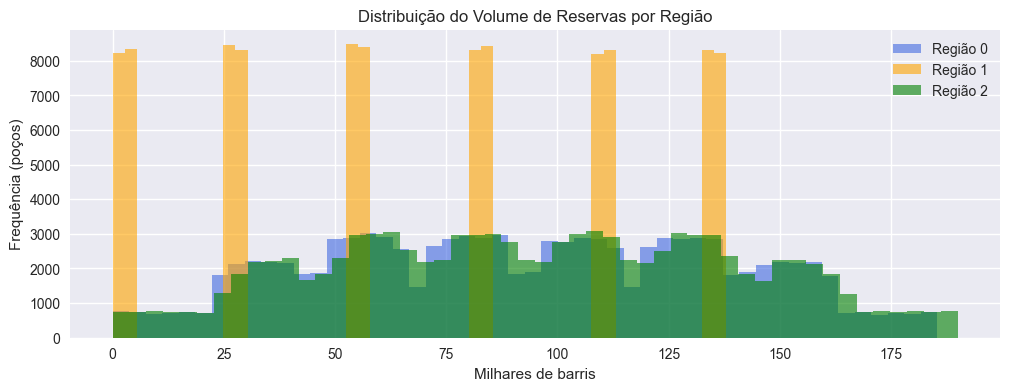

In [13]:
plt.figure(figsize=(12,4))
plt.hist(geodata0['product'], bins=50, alpha=0.6, label='Região 0', color='royalblue')
plt.hist(geodata1['product'], bins=50, alpha=0.6, label='Região 1', color='orange')
plt.hist(geodata2['product'], bins=50, alpha=0.6, label='Região 2', color='green')
plt.title('Distribuição do Volume de Reservas por Região')
plt.xlabel('Milhares de barris')
plt.ylabel('Frequência (poços)')
plt.legend()
plt.show()



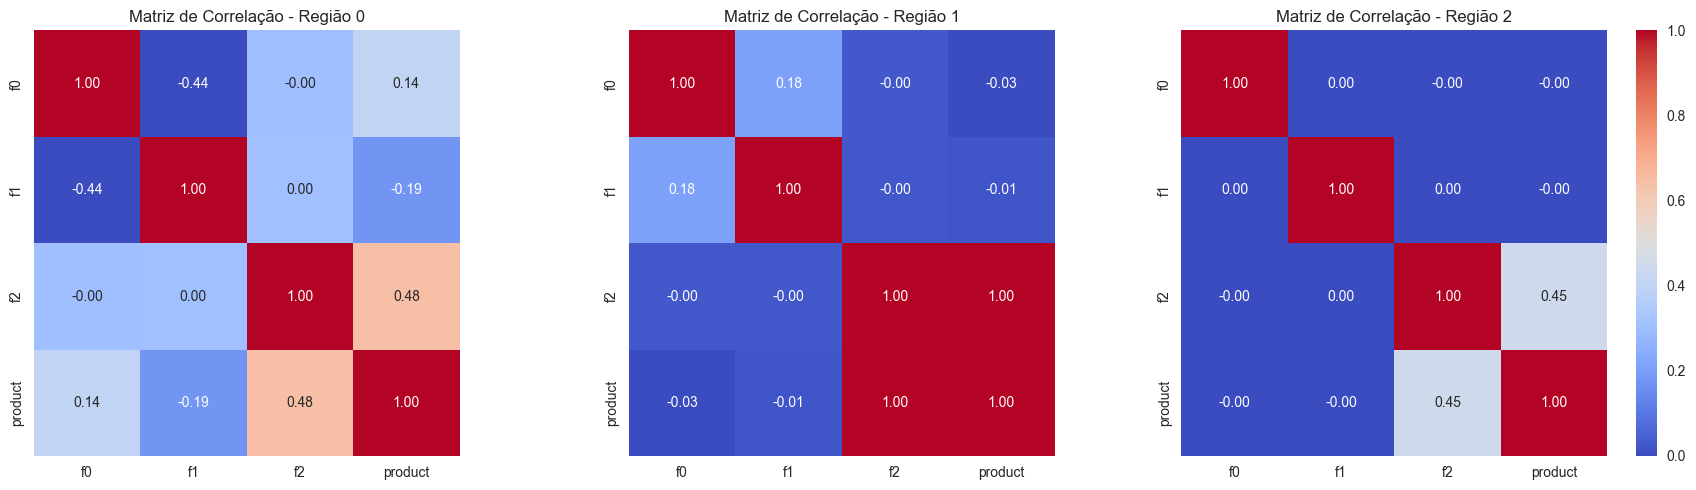

In [14]:
corr_0 = geodata0[['f0', 'f1', 'f2', 'product']].corr()
corr_1 = geodata1[['f0', 'f1', 'f2', 'product']].corr()
corr_2 = geodata2[['f0', 'f1', 'f2', 'product']].corr()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(corr_0, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=False, ax=axes[0])
axes[0].set_title('Matriz de Correlação - Região 0')
sns.heatmap(corr_1, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=False, ax=axes[1])
axes[1].set_title('Matriz de Correlação - Região 1')
sns.heatmap(corr_2, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True, ax=axes[2])
axes[2].set_title('Matriz de Correlação - Região 2')

plt.tight_layout()
plt.show()



Embora a matriz de correlação seja uma ferramenta bastante utilizada na análise exploratória, neste caso não foi possível identificar relações lineares relevantes entre as variáveis f0, f1 e f2 e a coluna product, que é o alvo deste projeto. Portanto, a análise de 
correlação não trouxe grandes informações para orientar a modelagem preditiva nesta etapa.

## 3.Preparação de Dados

In [15]:
X0, y0 = geodata0.drop(['id', 'product'], axis=1), geodata0['product']
X1, y1 = geodata1.drop(['id', 'product'], axis=1), geodata1['product']
X2, y2 = geodata2.drop(['id', 'product'], axis=1), geodata2['product']


In [16]:
# Região 0
X0_train, X0_valid, y0_train, y0_valid = train_test_split(X0, y0, test_size=0.25, random_state=42)
# Região 1
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.25, random_state=42)
# Região 2
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.25, random_state=42)


Padronização dos dados

In [17]:
# Região 0
scaler0 = StandardScaler()
X0_train_scaled = scaler0.fit_transform(X0_train)
X0_valid_scaled = scaler0.transform(X0_valid)

# Região 1
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_valid_scaled = scaler1.transform(X1_valid)

# Região 2
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_valid_scaled = scaler2.transform(X2_valid)


## 4.Modelagem Preditiva

### Função para aplicação do modelo de treinamento.

In [18]:
def treinar_e_avaliar (X_train_scaled, X_valid_scaled, y_train, y_valid, n):
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_valid_scaled)
    mse = mean_squared_error (y_valid, y_pred)
    rmse = np.sqrt(mse)
    media_predita = np.mean(y_pred)
    
    print ( f'RMSE (Região {n}): {rmse:.2f}')
    print ( f'Volume médio previsto (Região {n}): {media_predita:.2f}')
    
    return mse, rmse, media_predita, model

In [19]:
mse0, rmse0, media0, model0 = treinar_e_avaliar(X0_train_scaled, X0_valid_scaled, y0_train, y0_valid, n=0)
mse1, rmse1, media1, model1 = treinar_e_avaliar(X1_train_scaled, X1_valid_scaled, y1_train, y1_valid, n=1)
mse2, rmse2, media2, model2 = treinar_e_avaliar(X2_train_scaled, X2_valid_scaled, y2_train, y2_valid, n=2)


RMSE (Região 0): 37.76
Volume médio previsto (Região 0): 92.40
RMSE (Região 1): 0.89
Volume médio previsto (Região 1): 68.71
RMSE (Região 2): 40.15
Volume médio previsto (Região 2): 94.77


## 5.Avaliação dos Modelos

Após o treinamento dos modelos de regressão linear para cada região, avaliamos o desempenho utilizando o RMSE (Root Mean Squared Error) e o volume médio previsto no conjunto de validação. Os resultados estão resumidos na tabela abaixo:

| Região    | RMSE                | Volume Médio Previsto |
|-----------|---------------------|----------------------|
| Região 0  | 37,76               | 92,40                |
| Região 1  | 0,89                | 68,71                |
| Região 2  | 40,15               | 94,77                |

Observa-se que o modelo da **Região 1** apresentou um RMSE significativamente menor, indicando alta precisão nas previsões para essa área. Já as Regiões 0 e 2 apresentaram erros mais elevados, sugerindo maior dificuldade do modelo em capturar os padrões dos dados nessas regiões.

Essa análise quantitativa é essencial para fundamentar a seleção dos poços mais promissores e o cálculo do lucro potencial nas próximas etapas do projeto.


## 6.Cálculo de Lucro e Seleção dos Melhores Poços

In [20]:
budged = 100_000_000
pocos = 200
receita_barril = 4_500
min_units_needed = budged / receita_barril

print(f'Quantidade mínima de unidades necessárias para evitar prejuízos: {min_units_needed:.2f}')

Quantidade mínima de unidades necessárias para evitar prejuízos: 22222.22


In [21]:
# Região 0
X0_scaled = scaler0.transform(X0)  # X0 contém as features de todos os poços da região 0
geodata0['predicted'] = model0.predict(X0_scaled)
top200_0 = geodata0.nlargest(200, 'predicted')

# Região 1
X1_scaled = scaler1.transform(X1)
geodata1['predicted'] = model1.predict(X1_scaled)
top200_1 = geodata1.nlargest(200, 'predicted')

# Região 2
X2_scaled = scaler2.transform(X2)
geodata2['predicted'] = model2.predict(X2_scaled)
top200_2 = geodata2.nlargest(200, 'predicted')



In [22]:
# Região 0
receita_0 = top200_0['predicted'].sum() * 4500
custo_0 = 100_000_000
lucro_0 = receita_0 - custo_0
print(f'Lucro potencial (Região 0): ${lucro_0:,.2f}')


Lucro potencial (Região 0): $47,012,558.58


In [23]:
def calcular_lucro_top200(X, df, model, scaler, nome_regiao, custo_total=100_000_000, receita_unidade=4500):
    # Padroniza as features
    X_scaled = scaler.transform(X)
    # Gera as previsões e adiciona ao DataFrame original
    df['predicted'] = model.predict(X_scaled)
    # Seleciona os 200 melhores poços
    top200 = df.nlargest(200, 'predicted')
    # Calcula receita e lucro
    receita = top200['predicted'].sum() * receita_unidade
    lucro = receita - custo_total

    print(f'Lucro potencial ({nome_regiao}): ${lucro:,.2f}')
    print(f'Receita total ({nome_regiao}): ${receita:,.2f}')
    print(f'Volume total previsto ({nome_regiao}): {top200['predicted'].sum():,.2f} mil barris')

    return top200, receita, lucro



In [24]:
top200_0, receita_0, lucro_0 = calcular_lucro_top200(X0, geodata0, model0, scaler0, 'Região 0')
top200_1, receita_1, lucro_1 = calcular_lucro_top200(X1, geodata1, model1, scaler1, 'Região 1')
top200_2, receita_2, lucro_2 = calcular_lucro_top200(X2, geodata2, model2, scaler2, 'Região 2')


Lucro potencial (Região 0): $47,012,558.58
Receita total (Região 0): $147,012,558.58
Volume total previsto (Região 0): 32,669.46 mil barris
Lucro potencial (Região 1): $25,244,984.22
Receita total (Região 1): $125,244,984.22
Volume total previsto (Região 1): 27,832.22 mil barris
Lucro potencial (Região 2): $40,933,458.04
Receita total (Região 2): $140,933,458.04
Volume total previsto (Região 2): 31,318.55 mil barris


Após a seleção dos 200 poços mais promissores em cada região, apresentamos abaixo o resumo dos principais resultados financeiros previstos, considerando as regras do projeto (receita de \$4.500 por mil barris e custo fixo de \$100 milhões para o desenvolvimento dos poços):

| Região    | Volume Total Previsto<br>(mil barris) | Receita Total (\$)      | Lucro Potencial (\$)    |
|-----------|---------------------------------------|-------------------------|-------------------------|
| Região 0  | 32.669,46                             | 147.012.558,58          | 47.012.558,58           |
| Região 1  | 27.832,22                             | 125.244.984,22          | 25.244.984,22           |
| Região 2  | 31.318,55                             | 140.933.458,04          | 40.933.458,04           |

Diferente do que foi apresentado na avaliação do modelo, a região mais lucrativa é a **Região 0**. Isso acontece porque, enquanto a avaliação do modelo considera o desempenho médio das previsões, o cálculo do lucro potencial foca apenas nos 200 poços mais produtivos. Assim, uma região pode se destacar em lucro mesmo sem ter o melhor desempenho médio geral.


## 7.Análise de Risco com Bootstrapping

Função do Bootstrapping

In [25]:
def bootstrap_risco_lucro(df, receita_barril, custo_por_poco, n_simulacoes=1000, n_pocos=200, n_total=500, nome_regiao="Região"):
    import numpy as np

    def calculate_profit(sampled_df):
        best_well = sampled_df.sort_values(by="predicted", ascending=False)['product'].head(n_pocos)
        volume_well = best_well.sum()
        potential_profit = (volume_well * receita_barril) - (custo_por_poco * n_pocos)
        return potential_profit

    lucros_bootstrap = []
    for i in range(n_simulacoes):
        sampled_data = df.sample(n=n_total, replace=True, random_state=i)
        lucros_bootstrap.append(calculate_profit(sampled_data))

    lucros_bootstrap = np.array(lucros_bootstrap)
    prejuizo_count = np.sum(np.round(lucros_bootstrap, 2) <= 0)
    risco_prejuizo = prejuizo_count / n_simulacoes
    intervalo_confianca = np.percentile(lucros_bootstrap, [2.5, 97.5])
    lucro_medio = np.mean(lucros_bootstrap)

    print(f"\n{nome_regiao} - Lucro médio: ${lucro_medio:,.2f}")
    print(f"{nome_regiao} - Intervalo de confiança 95%: ${intervalo_confianca[0]:,.2f} a ${intervalo_confianca[1]:,.2f}")
    print(f"{nome_regiao} - Probabilidade de prejuízo: {risco_prejuizo*100:.2f}%")

    return lucro_medio, intervalo_confianca, risco_prejuizo


In [26]:
receita_barril = 4500           
budged = 100_000_000           
pocos = 200 

lucro_medio_0, intervalo_0, risco_0 = bootstrap_risco_lucro(
    geodata0, receita_barril, budged/pocos, nome_regiao="Região 0"
)
lucro_medio_1, intervalo_1, risco_1 = bootstrap_risco_lucro(
    geodata1, receita_barril, budged/pocos, nome_regiao="Região 1"
)
lucro_medio_2, intervalo_2, risco_2 = bootstrap_risco_lucro(
    geodata2, receita_barril, budged/pocos, nome_regiao="Região 2"
)




Região 0 - Lucro médio: $4,331,084.40
Região 0 - Intervalo de confiança 95%: $-652,942.65 a $9,724,072.82
Região 0 - Probabilidade de prejuízo: 3.60%

Região 1 - Lucro médio: $4,365,546.01
Região 1 - Intervalo de confiança 95%: $417,167.78 a $8,215,891.71
Região 1 - Probabilidade de prejuízo: 1.80%

Região 2 - Lucro médio: $3,692,290.85
Região 2 - Intervalo de confiança 95%: $-1,360,008.05 a $8,492,361.99
Região 2 - Probabilidade de prejuízo: 8.20%


A Região 1  é a única que atende ao critério de risco do projeto, com risco de apenas 1,80%.

Os intervalos de confiança mostram que há incerteza significativa nos lucros, mas apenas a Região 1 garante que, em 95% das simulações, o lucro será positivo.

## 8.Conclusão

De acordo com a análise de risco realizada via bootstrapping:

- **Apenas a Região 1 é elegível para investimento**, pois apresenta risco de prejuízo inferior ao limite de 2,5% estabelecido pelo projeto (1,8%) e também o maior lucro médio entre as regiões que atendem ao critério.
- As demais regiões devem ser descartadas, já que o risco de prejuízo supera o limite permitido.

Esses resultados orientam a decisão estratégica, priorizando segurança financeira e retorno esperado conforme as regras do projeto.
